## **Saving a Basic FastAI Model**

In [46]:
from fastai.vision.all import *

Downloading and decompressing the dataset which contains images of cats and dogs.

In [47]:
path=untar_data(URLs.PETS)/'images'

In the PETS dataset, images of cats are given file names which start with an upper case later, so we label accordingly...

In [48]:
def is_cat(x):
    return x[0].isupper()

Creating `DataLoaders`:

In [49]:
dls = ImageDataLoaders.from_name_func('.',
                                      get_image_files(path), valid_pct=0.2, seed=42,
                                      label_func=is_cat,
                                      item_tfms=Resize(192))

Selecting only the first 1000 images so that the model is trained quickly...

In [50]:
total_images = len(dls.train_ds.items) + len(dls.valid_ds.items)        # Finding the total number of images (training + validation dataset)
print("Total number of images:", total_images)
images=dls.train_ds[:500]                               # Choosing the 1st 500 images
# Updating the dataloaders with the selected images
dls.train.ds = images

Total number of images: 7390


In [51]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.184635,0.047540,0.015562,04:56


epoch,train_loss,valid_loss,error_rate,time
0,0.087065,0.021618,0.005413,06:27
1,0.037276,0.035950,0.014208,06:12
2,0.022192,0.019947,0.008119,06:15


Exporting the trained model model, which contains all the required info to run the model

In [54]:
learn.export('model.pkl')

## **Dogs vs Cats**
Testing the model...

In [59]:
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

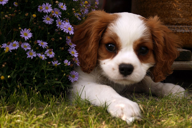

In [62]:
im = PILImage.create('dog.jpg')
im.thumbnail((192, 192))
im

In [63]:
learn=load_learner('model.pkl')

In [64]:
learn.predict(im)               # It predicts cat=False, which means dog=True, therefore the prediction is correct

('False', tensor(0), tensor([1.0000e+00, 1.3153e-07]))

In [67]:
# Converting it into a function
categories=('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [68]:
classify_image(im)

{'Dog': 0.9999998807907104, 'Cat': 1.3153218958450452e-07}

In [ ]:
# Making it Gradio compatible
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples=['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

c:\Users\Vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\Vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\Vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\Vansh\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


### **Export**

In [6]:
import nbdev

In [7]:
# Not working... therefore all #|export removed

#migrate_nb('lesson2.jpynb')
nbdev.export.nb_export('lesson2.ipynb', 'app.py')
print("Export successful!")

NameError: name 'migrate_nb' is not defined